In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#importing the data
df = pd.read_csv('../data/Smokers_drinkers_dataset.csv')

In [3]:
#view the dataframe
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


In [4]:
#changin the 'sex' and 'DRK_YN' to be values
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df["DRK_YN"] = label_encoder.fit_transform(df["DRK_YN"])
df["sex"] = label_encoder.fit_transform(df["sex"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               999 non-null    int32  
 1   age               999 non-null    int64  
 2   height            999 non-null    int64  
 3   weight            999 non-null    int64  
 4   waistline         999 non-null    float64
 5   sight_left        999 non-null    float64
 6   sight_right       999 non-null    float64
 7   hear_left         999 non-null    int64  
 8   hear_right        999 non-null    int64  
 9   SBP               999 non-null    int64  
 10  DBP               999 non-null    int64  
 11  BLDS              999 non-null    int64  
 12  tot_chole         999 non-null    int64  
 13  HDL_chole         999 non-null    int64  
 14  LDL_chole         999 non-null    int64  
 15  triglyceride      999 non-null    int64  
 16  hemoglobin        999 non-null    float64
 1

In [6]:
#changing to be int64
df["sex"] = df["sex"].astype(np.int64)
df["DRK_YN"] = df["DRK_YN"].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               999 non-null    int64  
 1   age               999 non-null    int64  
 2   height            999 non-null    int64  
 3   weight            999 non-null    int64  
 4   waistline         999 non-null    float64
 5   sight_left        999 non-null    float64
 6   sight_right       999 non-null    float64
 7   hear_left         999 non-null    int64  
 8   hear_right        999 non-null    int64  
 9   SBP               999 non-null    int64  
 10  DBP               999 non-null    int64  
 11  BLDS              999 non-null    int64  
 12  tot_chole         999 non-null    int64  
 13  HDL_chole         999 non-null    int64  
 14  LDL_chole         999 non-null    int64  
 15  triglyceride      999 non-null    int64  
 16  hemoglobin        999 non-null    float64
 1

In [7]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

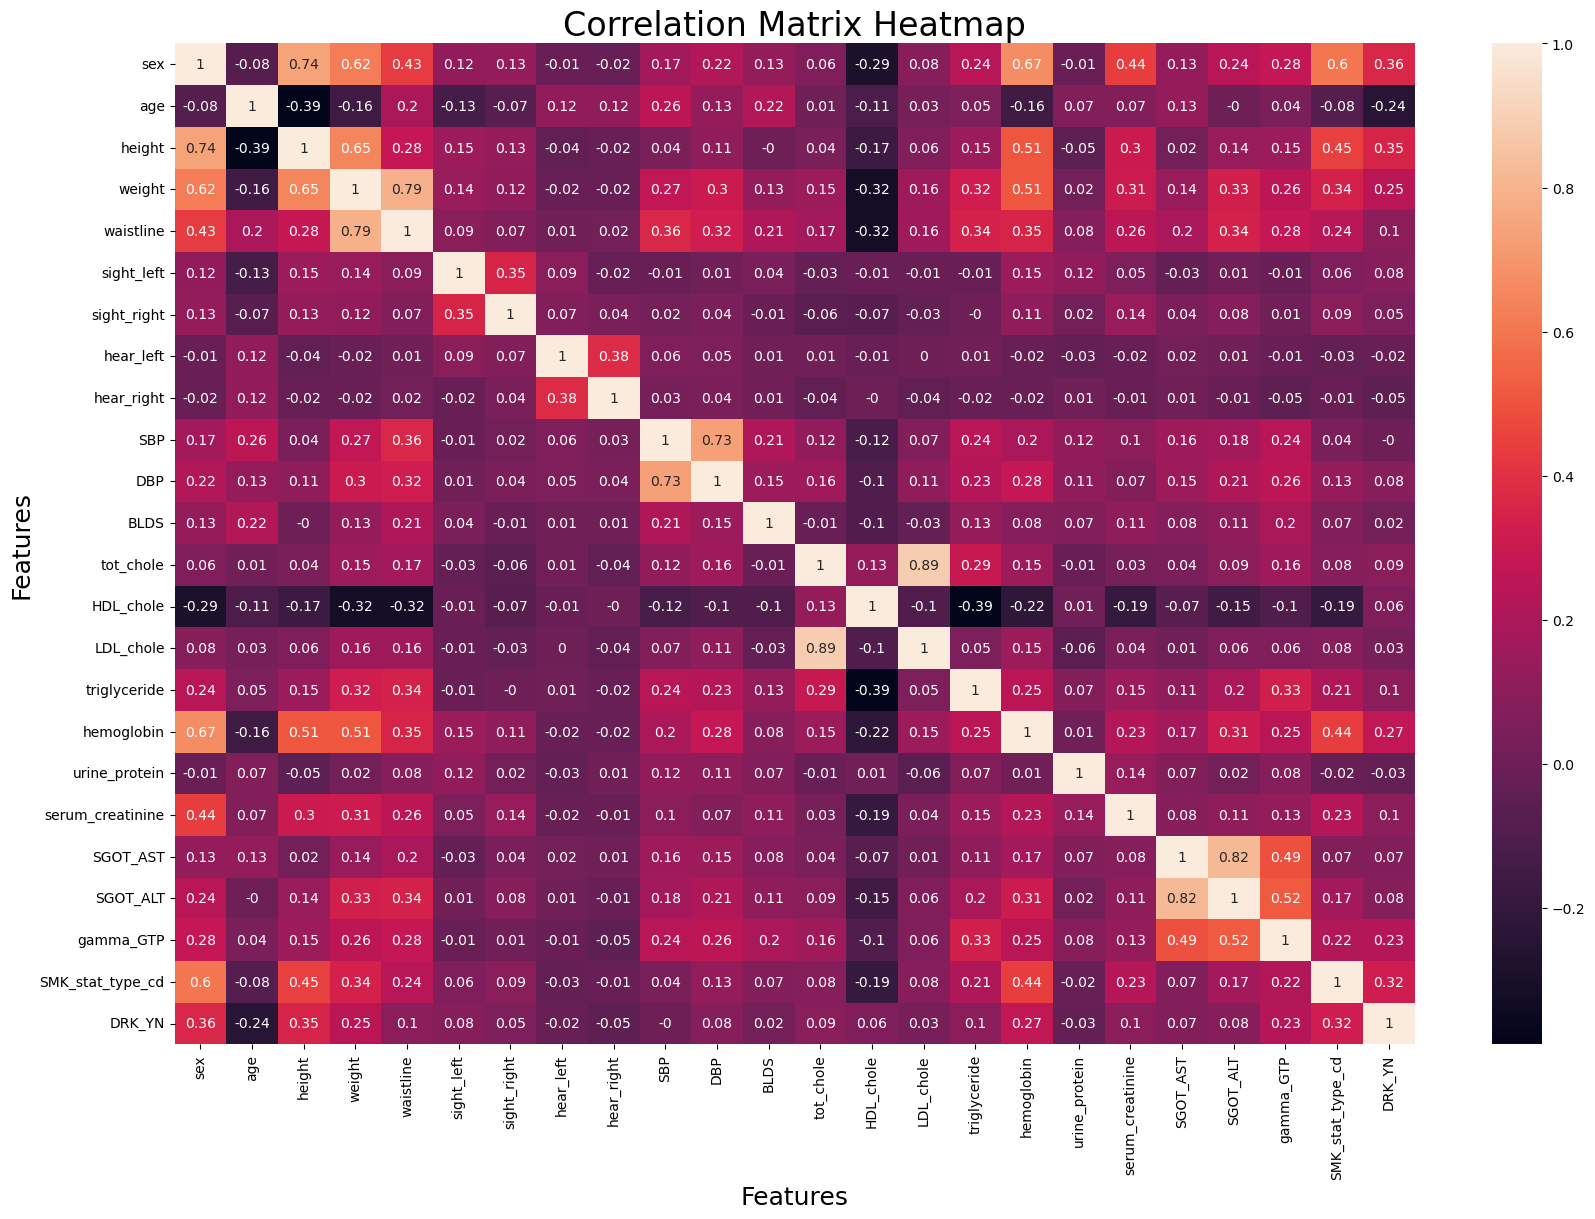

In [8]:
#correlation
plt.figure(figsize = (20, 13))
sns.heatmap(round(df.corr(), 2), annot = True)
plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Features', fontsize=18)

# Show the plot
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
#spliting our data into x and y
X = df.drop('DRK_YN', axis=1)
y = df['DRK_YN']

#spliting data to be test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
#model training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [11]:
#making predictions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

In [12]:
# evaluating the model
print("Smoker or drinker Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Smoker or drinker Model Performance:
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       140
           1       0.72      0.72      0.72       160

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300

Confusion Matrix:
 [[ 95  45]
 [ 45 115]]


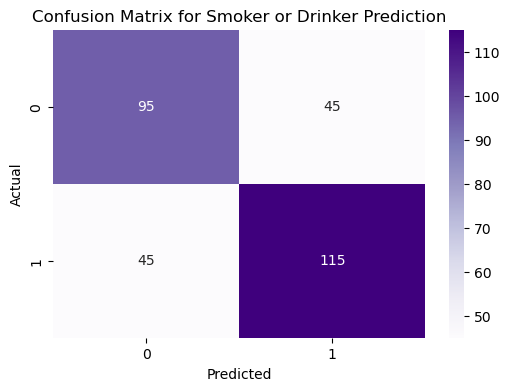

In [13]:
# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix for Smoker or Drinker Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();